# Linear and Logistic Regression 

This Jupyter Notebook accompanies the blog posts on Linear and Logistic Regression found [here](https://mukul-rathi.github.io/blog.html) 

First of all we will begin by importing the libraries we will need. 
__Numpy__ is a linear algebra library in Python and we will be using it to do all of the matrix and vector computations in our code.
__Pandas__ is used to import our data and clean it up before we pass it to our machine learning algorithms.
__Matplotlib__ will allow us to visualise the training process as a graph.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Preprocessing the Input

Now to import the data - for linear regression. the dataset is on Housing Prices in Boston, sourced from [Kaggle](https://www.kaggle.com/c/boston-housing). This explains which features the abbreviated columns look at. 

For the purposes of the tutorial, we will split the train.csv file provided by Kaggle into our own train and test set, since the test.csv file doesn't have any labels.

**EXTENSION**: run the algorithms on the test.csv (provided in this repo) and submit your predictions to Kaggle!

In [3]:
house_dataset = pd.read_csv("boston-housing-dataset/train.csv")
house_dataset.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


Next to clean up into the format we want:

$X$ = _n x m_ matrix, $Y$ = _1 x m_ matrix.

We can remove the ID column, since it is not a feature. 

We will shuffle the data - this is good practice as it ensures the learning is not affected by a particular ordering of data. 

We normalise it (so the features are in range [0,1] - we do this using formula $$x_{norm} = \frac{x - \mu}{\sigma}$$ where $\mu$ = mean and $\sigma$ = standard deviation.

We then split the dataset into train:test in an 80:20 split, and then separate the input features from the labels.

In [4]:
house_dataset.drop("ID", axis=1, inplace=True)
house_dataset = house_dataset.reindex(np.random.permutation(house_dataset.index))

#normalise the input features - this ensures they are all in the same range 0-1. 
house_dataset.loc[:, house_dataset.columns!="medv"] -= house_dataset.loc[:, house_dataset.columns!="medv"].mean()
house_dataset.loc[:, house_dataset.columns!="medv"] /= house_dataset.loc[:, house_dataset.columns!="medv"].std()

#slice to get train:test split then transpose to get correct dimensions
X_lin_train = house_dataset.loc[:house_dataset.shape[0]*4//5, house_dataset.columns!="medv"].values.T 
Y_lin_train = house_dataset.loc[:house_dataset.shape[0]*4//5, ["medv"]].values.T

X_lin_test = house_dataset.loc[house_dataset.shape[0]*4//5:, house_dataset.columns!="medv"].values.T
Y_lin_test = house_dataset.loc[house_dataset.shape[0]*4//5:, ["medv"]].values.T


Now to load the breast cancer dataset - again this is from <a href="https://www.kaggle.com/uciml/breast-cancer-wisconsin-data">Kaggle</a> (though originally from UCI). To contrast with the other dataset, this dataset has features which seem hard to interpret on their own, unlike with housing prices where we can intuitively make sense of the features - e.g more rooms implies higher price. 
<br> This is where the power of machine learning comes in - to spot patterns in the data not possible by humans.

In [5]:
cancer_dataset = pd.read_csv("breast-cancer-dataset/data.csv")
cancer_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Now to clean up the data - remove the id, and convert the label from M/B to 1/0, as well as normalise the data and shuffle.

In [6]:
cancer_dataset.drop(["id",'Unnamed: 32'], axis=1, inplace=True)
cancer_dataset["diagnosis"] = cancer_dataset["diagnosis"].apply(lambda x: 1 if (x=="M") else 0)

#shuffle data
cancer_dataset = cancer_dataset.reindex(np.random.permutation(cancer_dataset.index))

#normalise the input features - this ensures they are all in the same range 0-1. 
cancer_dataset.loc[:, cancer_dataset.columns!="diagnosis"] -= cancer_dataset.loc[:, cancer_dataset.columns!="diagnosis"].mean()
cancer_dataset.loc[:, cancer_dataset.columns!="diagnosis"] /= cancer_dataset.loc[:, cancer_dataset.columns!="diagnosis"].std()



Now we have our $X$ and $Y$ for train and test for both linear and logistic regression. 

In [8]:
X_log_train = cancer_dataset.loc[:cancer_dataset.shape[0]*4//5, cancer_dataset.columns!="diagnosis"].values.T 
Y_log_train = cancer_dataset.loc[:cancer_dataset.shape[0]*4//5, ["diagnosis"]].values.T 

X_log_test = cancer_dataset.loc[cancer_dataset.shape[0]*4//5:, cancer_dataset.columns!="diagnosis"].values.T 
Y_log_test = cancer_dataset.loc[cancer_dataset.shape[0]*4//5:, ["diagnosis"]].values.T  

## Initialise model

Next, we initialise the weights and biases

In [9]:
W_lin = np.random.randn(Y_lin_train.shape[0], X_lin_train.shape[0])
b_lin = np.random.randn(Y_lin_train.shape[0],1)

W_log = np.random.randn(Y_log_train.shape[0], X_log_train.shape[0])
b_log = np.random.randn(Y_log_train.shape[0],1)


Now we code up the equations for the forward step:
    $$ \hat{Y}_{lin} = WX+b$$
    $$ \hat{Y}_{log} = \sigma(WX+b)$$

In [10]:
def forward_lin(X, W, b):
    return np.dot(W,X)+b

def sigmoid(z):
    return 1.0/(1+np.exp(-z))

def forward_log(X,W,b):
    return sigmoid(forward_lin(X,W,b))

Let's look at some sample predictions from the network.

In [10]:
pd.DataFrame({"predictions":forward_lin(X_lin_train[:,:3],W_lin,b_lin)[0] , "Y": Y_lin_train[:,:3][0] }).head()

,Y,predictions
0,19.5,-1.586914
1,22.6,5.494474
2,23.9,-2.393939


In [11]:
pd.DataFrame({"predictions":forward_log(X_log_train[:,:5],W_log,b_log)[0] , "Y": Y_log_train[:,:5][0] }).head()

,Y,predictions
0,0,0.209461
1,0,0.840123
2,1,0.828904
3,0,0.534362
4,1,0.060692


Not very good! So let's train the model:

First - the **loss functions** need to be defined: these are

$$ J(W,b) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2 $$


$$ J(W,b) = \frac{-1}{m} \sum_{i=1}^{m} y^{(i)} \log(\hat{y}^{(i)}) + (1-y^{(i)}) \log(1-\hat{y}^{(i)})$$



In [11]:
def MSE_loss(Y, Y_pred):
    m = Y.shape[1]
    return (1.0/(2*m))*np.sum(np.square(Y_pred-Y))
                                      

def log_loss(Y, Y_pred):
    m = Y.shape[1]
    return (-1.0/m)*np.sum(Y*np.log(Y_pred) + (1-Y)*np.log(1-Y_pred))
    

In [12]:
MSE_loss(Y_lin_train,forward_lin(X_lin_train,W_lin,b_lin))

142.44446138745633

Now, to compute the gradients, note that they are actually the same for both linear and logistic regression:
$$\frac{\partial{J}}{\partial{W}} =  \frac{1}{m} \sum_{i=1}^{m} x^{(i)}(\hat{y}^{(i)} - y^{(i)})$$
$$\frac{\partial{J}}{\partial{b}} =  \frac{1}{m} \sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)}) $$

The first equation in matrix form is:

$$\frac{\partial{J}}{\partial{W}} =  \frac{1}{m} (\hat{Y} - Y).X^{T}$$




In [14]:
def grads(X, Y, Y_pred):
    m = Y.shape[1]
    dW = (1.0/m)*np.dot(Y_pred-Y,X.T)
    db = (1.0/m)*np.sum((Y_pred-Y),axis=1,keepdims=True)
    return dW, db

## Training the model 

Finally, we can train the model for both linear and logistic regression.

The gradient descent update equation is as follows:

$$ W= W - \alpha \frac{\partial \mathcal{J} }{\partial W} $$

$$ b = b - \alpha \frac{\partial \mathcal{J} }{\partial b} $$

We will loop over the training set for a set number of iterations (feel free to tweak $\alpha$ and the number of iterations - these are hyperparameters).
We'll also periodically output the loss at that iteration.

In [15]:
def gradient_descent_lin(X, W, b, Y, alpha=1e-2, iterations=500):
    MSE_losses = [] #keep track of losses to plot
    for i in range(iterations):
        Y_pred = forward_lin(X, W, b)
        MSE_losses.append(MSE_loss(Y,Y_pred)) 
        if(i%50==0):
            print("Iteration {}: Loss={}".format(i, MSE_losses[i]))
        dW, db = grads(X, Y, Y_pred)
        W = W -  alpha*dW
        b = b - alpha*db
    #plot the learning curve
    plt.plot(range(iterations),MSE_losses)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.show()
    return W, b


def gradient_descent_log(X, W, b, Y, alpha=3e-2, iterations=1000):
    log_losses = [] #keep track of losses to plot
    for i in range(iterations):
        Y_pred = forward_log(X, W, b)
        log_losses.append(log_loss(Y, Y_pred))
        if(i%50==0):
            print("Iteration {}: Loss={}".format(i, log_losses[i]))
        dW, db = grads(X, Y, Y_pred)
        W = W -  alpha*dW
        b = b - alpha*db
    #plot the learning curve
    plt.plot(range(iterations),log_losses)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.show()
    return W, b

Let's run gradient descent on our training dataset:

Iteration 0: Loss=262.0815117020298
Iteration 50: Loss=92.37719314829103
Iteration 100: Loss=42.77267590051945
Iteration 150: Loss=22.27903968209717
Iteration 200: Loss=13.292711548638371
Iteration 250: Loss=9.130594246847615
Iteration 300: Loss=7.052356946860518
Iteration 350: Loss=5.912583078605908
Iteration 400: Loss=5.22192590557804
Iteration 450: Loss=4.764288252119233


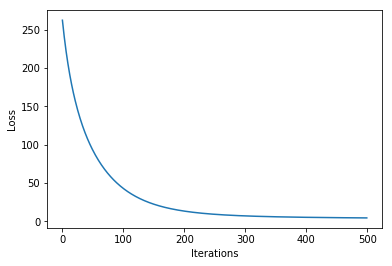

In [16]:
W_lin, b_lin = gradient_descent_lin(X_lin_train, W_lin, b_lin, Y_lin_train )

Iteration 0: Loss=2.4688115658422487
Iteration 50: Loss=0.27787476325631844
Iteration 100: Loss=0.1551004857694995
Iteration 150: Loss=0.11381878173544119
Iteration 200: Loss=0.09184940357069409
Iteration 250: Loss=0.07788822478223308
Iteration 300: Loss=0.06810060350800586
Iteration 350: Loss=0.06079348172040011
Iteration 400: Loss=0.05509414560237362
Iteration 450: Loss=0.0505028590616163
Iteration 500: Loss=0.046710972311958705
Iteration 550: Loss=0.04351670724171835
Iteration 600: Loss=0.040782171422264035
Iteration 650: Loss=0.03840970535996516
Iteration 700: Loss=0.03632807388257483
Iteration 750: Loss=0.03448400967079236
Iteration 800: Loss=0.03283682573364153
Iteration 850: Loss=0.03135486685756147
Iteration 900: Loss=0.030013104673279712
Iteration 950: Loss=0.028791466883314944


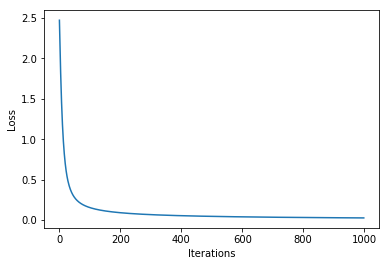

In [17]:
W_log, b_log = gradient_descent_log(X_log_train, W_log,b_log, Y_log_train)

Finally, we can test our trained algorithms on the test set:
For the logistic regression algorithm, we can measure its performance with accuracy, for linear regression we use MSE.

In [18]:
MSE_loss(Y_lin_test, forward_lin(X_lin_test,W_lin,b_lin))

24.35323181847871

In [19]:
def accuracy(Y,Y_pred):
    return np.mean(np.abs(np.rint(Y_pred)-Y)) #rint rounds to nearest int

In [20]:
accuracy(Y_log_test, forward_log(X_log_test,W_log,b_log))

0.05917159763313609

It seems like the accuracy is pretty poor! 

However, accuracy is not a good metric when the dataset is skewed, instead we look at another metric called the **F1 Score** (ranges between 0 and 1) - higher is better. Using this, it turns out our logistic regression model's performance is pretty good!

In [21]:
def F1_Score(Y_pred, Y):
    prediction = np.rint(Y_pred)
    
    truth_pos = (Y == np.ones_like(Y))
    truth_neg = (Y == np.zeros_like(Y))
    pred_pos = (prediction == np.ones_like(prediction))
    pred_neg = (prediction == np.zeros_like(prediction))

    true_pos = np.sum(np.logical_and(truth_pos,pred_pos))
    if true_pos == 0: #This prevents an undefined computation since precision=recall=0 
        return 0
    false_pos =np.sum(np.logical_and(truth_neg,pred_pos))
    false_neg =np.sum(np.logical_and(truth_pos,pred_neg))
    true_neg =np.sum(np.logical_and(truth_neg,pred_neg))

    precision = true_pos/(true_pos + false_pos)
    recall = (true_pos)/(true_pos + false_neg)
    F1_score = 2*(recall*precision) /(recall + precision)
    return F1_score 

In [22]:
F1_Score(forward_log(X_log_test,W_log,b_log),Y_log_test)

0.918918918918919